## Prediksi Kecepatan Kipas menggunakan Random Forest Regression dan Multilayer Perceptron

In [15]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('sierad.csv')
df.head()

,Room_T,RH,Teff,Wind_Speed
0,35,30,35.0,0.0
1,35,30,34.3,0.1
2,35,30,33.0,0.3
3,35,30,31.6,0.5
4,35,30,29.8,0.7


In [174]:
df

,Room_T,RH,Teff,Wind_Speed
0,35,30,35.0,0.0
1,35,30,34.3,0.1
2,35,30,33.0,0.3
3,35,30,31.6,0.5
4,35,30,29.8,0.7
5,35,30,27.9,0.9
6,35,30,26.1,1.1
7,35,30,25.0,1.3
8,35,30,23.8,1.5
9,35,30,23.4,1.7


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [6]:
x = df.drop(['Wind_Speed'], axis = 1)
y = df.Wind_Speed
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

### Random Forest Regression

In [8]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.002, MSE test data: 0.011
R2 train data: 0.997, R2 test data: 0.983


R-squared merupakan perhitungan statistik tentang sedekat apa data terhadap garis regresi.
Nilai R2 train data sebesar 0.997 sedangkan R2 untuk test data sebesar 0.983.

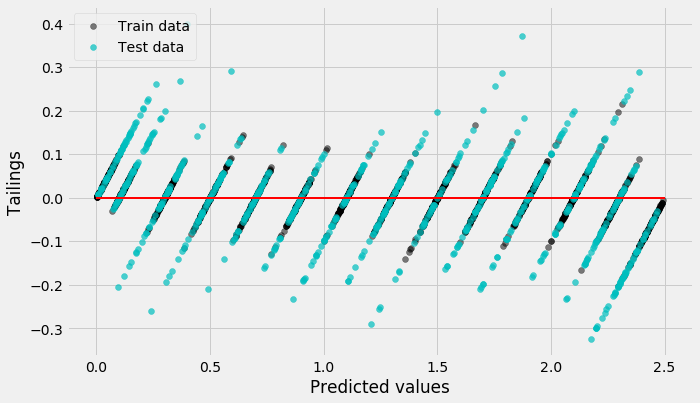

In [167]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 2.5 , lw = 2, color = 'red')
pl.show()

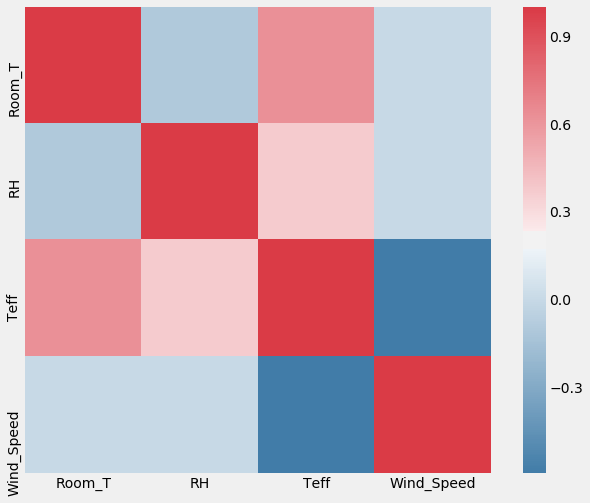

In [168]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [17]:
corr

,Room_T,RH,Teff,Wind_Speed
Room_T,1.000000e+00,-1.030814e-01,0.620933,-1.659294e-18
RH,-1.030814e-01,1.000000e+00,0.370089,-1.292062e-17
Teff,6.209332e-01,3.700887e-01,1.000000,-5.955529e-01
Wind_Speed,-1.659294e-18,-1.292062e-17,-0.595553,1.000000e+00


x_test.shape

forest.predict([[21, 60, 18.9]])

forest_test_pred.shape

### Multilayer Perceptron

In [31]:
import pandas as pd
import numpy as np

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [82]:
# The ANN architecture
regressor = Sequential()
# First ANN layer with Dropout regularisation
regressor.add(Dense(units=3, activation='relu'))
# regressor.add(Dropout(0.2)) #tiap trning ngetutupin leyer dng probabilitas 0.2 agar supaya layernya gak fokus disitu2 ae
# Second ANN layer
regressor.add(Dense(units=200, activation='relu'))
# regressor.add(Dropout(0.2))
# Third ANN layer
regressor.add(Dense(units=100,activation='relu'))
# regressor.add(Dropout(0.2))
regressor.add(Dense(units=25,activation='relu'))
# The output layer
regressor.add(Dense(units=1, activation='linear'))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_absolute_error') #optimizer disini adalah backpropnya
# Fitting to the training set
# regressor.fit(x_train.values,y_train.values,epochs=300,batch_size=32)
regressor.fit(x_train.values,y_train.values,epochs=500,batch_size=32, validation_data=[x_test, y_test])

Train on 2320 samples, validate on 774 samples
Epoch 1/500
2320/2320 [==============================] - 2s 834us/step - loss: 0.9495 - val_loss: 0.7672
Epoch 2/500
2320/2320 [==============================] - 0s 71us/step - loss: 0.6835 - val_loss: 0.6905
Epoch 3/500
2320/2320 [==============================] - 0s 69us/step - loss: 0.7024 - val_loss: 0.7008
Epoch 4/500
2320/2320 [==============================] - 0s 82us/step - loss: 0.6486 - val_loss: 0.6159
Epoch 5/500
2320/2320 [==============================] - 0s 60us/step - loss: 0.4990 - val_loss: 0.3570
Epoch 6/500
2320/2320 [==============================] - 0s 64us/step - loss: 0.3285 - val_loss: 0.2675
Epoch 7/500
2320/2320 [==============================] - 0s 68us/step - loss: 0.2995 - val_loss: 0.2643
Epoch 8/500
2320/2320 [==============================] - 0s 69us/step - loss: 0.3081 - val_loss: 0.2754
Epoch 9/500
2320/2320 [==============================] - 0s 70us/step - loss: 0.2807 - val_loss: 0.2296
Epoch 10/500
232

2320/2320 [==============================] - 0s 69us/step - loss: 0.1035 - val_loss: 0.1022
Epoch 156/500
2320/2320 [==============================] - 0s 71us/step - loss: 0.1088 - val_loss: 0.1175
Epoch 157/500
2320/2320 [==============================] - 0s 82us/step - loss: 0.0975 - val_loss: 0.1153
Epoch 158/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.1051 - val_loss: 0.0902
Epoch 159/500
2320/2320 [==============================] - 0s 50us/step - loss: 0.0960 - val_loss: 0.0940
Epoch 160/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.1031 - val_loss: 0.1019
Epoch 161/500
2320/2320 [==============================] - 0s 76us/step - loss: 0.1049 - val_loss: 0.1189
Epoch 162/500
2320/2320 [==============================] - 0s 71us/step - loss: 0.1003 - val_loss: 0.0896
Epoch 163/500
2320/2320 [==============================] - 0s 78us/step - loss: 0.1019 - val_loss: 0.1020
Epoch 164/500
2320/2320 [==============================] - 0

2320/2320 [==============================] - 0s 68us/step - loss: 0.0923 - val_loss: 0.0783
Epoch 310/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.0837 - val_loss: 0.0808
Epoch 311/500
2320/2320 [==============================] - 0s 48us/step - loss: 0.0907 - val_loss: 0.1011
Epoch 312/500
2320/2320 [==============================] - 0s 49us/step - loss: 0.0820 - val_loss: 0.0812
Epoch 313/500
2320/2320 [==============================] - 0s 52us/step - loss: 0.0852 - val_loss: 0.0874
Epoch 314/500
2320/2320 [==============================] - 0s 63us/step - loss: 0.0930 - val_loss: 0.0914
Epoch 315/500
2320/2320 [==============================] - 0s 55us/step - loss: 0.0867 - val_loss: 0.1000
Epoch 316/500
2320/2320 [==============================] - 0s 68us/step - loss: 0.0852 - val_loss: 0.0753
Epoch 317/500
2320/2320 [==============================] - 0s 75us/step - loss: 0.0802 - val_loss: 0.0834
Epoch 318/500
2320/2320 [==============================] - 0

2320/2320 [==============================] - 0s 54us/step - loss: 0.0704 - val_loss: 0.0844
Epoch 464/500
2320/2320 [==============================] - 0s 48us/step - loss: 0.0641 - val_loss: 0.0750
Epoch 465/500
2320/2320 [==============================] - 0s 52us/step - loss: 0.0814 - val_loss: 0.0783
Epoch 466/500
2320/2320 [==============================] - 0s 62us/step - loss: 0.0671 - val_loss: 0.0664
Epoch 467/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.0703 - val_loss: 0.0968
Epoch 468/500
2320/2320 [==============================] - 0s 69us/step - loss: 0.0741 - val_loss: 0.1152
Epoch 469/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.0787 - val_loss: 0.0738
Epoch 470/500
2320/2320 [==============================] - 0s 65us/step - loss: 0.0676 - val_loss: 0.0609
Epoch 471/500
2320/2320 [==============================] - 0s 57us/step - loss: 0.0708 - val_loss: 0.0803
Epoch 472/500
2320/2320 [==============================] - 0

In [51]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_13 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               1200      
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
Total params: 31,312
Trainable params: 31,312
Non-trainable params: 0
_________________________________________________________________


np.array([21, 60, 18.9]).shape

In [99]:
regressor.fit(x_train.values,y_train.values,epochs=300,batch_size=32, validation_data=[x_test, y_test])

Train on 2320 samples, validate on 774 samples
Epoch 1/300
2320/2320 [==============================] - 0s 65us/step - loss: 0.0611 - val_loss: 0.0590
Epoch 2/300
2320/2320 [==============================] - 0s 69us/step - loss: 0.0578 - val_loss: 0.0773
Epoch 3/300
2320/2320 [==============================] - 0s 68us/step - loss: 0.0759 - val_loss: 0.0685
Epoch 4/300
2320/2320 [==============================] - 0s 67us/step - loss: 0.0721 - val_loss: 0.0713
Epoch 5/300
2320/2320 [==============================] - 0s 69us/step - loss: 0.0671 - val_loss: 0.0841
Epoch 6/300
2320/2320 [==============================] - 0s 66us/step - loss: 0.0735 - val_loss: 0.0714
Epoch 7/300
2320/2320 [==============================] - 0s 70us/step - loss: 0.0634 - val_loss: 0.0629
Epoch 8/300
2320/2320 [==============================] - 0s 67us/step - loss: 0.0706 - val_loss: 0.0589
Epoch 9/300
2320/2320 [==============================] - 0s 71us/step - loss: 0.0727 - val_loss: 0.0743
Epoch 10/300
2320

2320/2320 [==============================] - 0s 62us/step - loss: 0.0565 - val_loss: 0.0818
Epoch 156/300
2320/2320 [==============================] - 0s 65us/step - loss: 0.0703 - val_loss: 0.0816
Epoch 157/300
2320/2320 [==============================] - 0s 59us/step - loss: 0.0571 - val_loss: 0.0544
Epoch 158/300
2320/2320 [==============================] - 0s 66us/step - loss: 0.0516 - val_loss: 0.0587
Epoch 159/300
2320/2320 [==============================] - 0s 70us/step - loss: 0.0546 - val_loss: 0.0607
Epoch 160/300
2320/2320 [==============================] - 0s 67us/step - loss: 0.0562 - val_loss: 0.0554
Epoch 161/300
2320/2320 [==============================] - 0s 70us/step - loss: 0.0553 - val_loss: 0.0581
Epoch 162/300
2320/2320 [==============================] - 0s 67us/step - loss: 0.0544 - val_loss: 0.0576
Epoch 163/300
2320/2320 [==============================] - 0s 66us/step - loss: 0.0557 - val_loss: 0.0579
Epoch 164/300
2320/2320 [==============================] - 0

### Prediksi menggunakan Jaringan Syaraf Tiruan

In [188]:
# temperature, humidity, temperature efisien
regressor.predict(np.array([[33, 60, 27.6]]))

array([[1.1028125]], dtype=float32)

### Prediksi menggunakan Random Forest Regression

In [187]:
forest.predict([[33, 60, 27.6]])

array([1.108])

### Nilai R-squared Random Forest Regression dan Multilayer Perceptron

In [175]:
print('Score Random Forest Regression sebesar'), r2_score(y_test,forest_test_pred)
print('Score Multilayer Perceptron sebesar'), r2_score(y_test,arrayo)

Score Random Forest Regression sebesar 0.9831395603316508
Score Multilayer Perceptron sebesar 0.991581013570835


x_test.values[0].shape

In [94]:
regressor.predict(x_test.values[0].reshape((1,3))).item()

1.9971083402633667

In [100]:
listo = []
for i in x_test.values:
    prediction = regressor.predict(i.reshape((1,3))).item()
    listo.append(prediction)

In [101]:
arrayo = np.array(listo).reshape((len(listo),))

listo

In [146]:
teff_sort = x_test

In [147]:
teff_sort['actual'] = y_test
teff_sort['predicted'] = listo

In [148]:
teff_sort = teff_sort.sort_values(by='Teff')

In [149]:
teff_sort = teff_sort.reset_index()

In [150]:
teff_sort['predicted'] = teff_sort['predicted'].apply(lambda x : round(x,2))


In [176]:
baru = teff_sort.sort_values(by='actual').reset_index(drop=True)

In [180]:
baru.to_csv('teff_baru.csv')

In [177]:
round(2.364926,2)

2.36

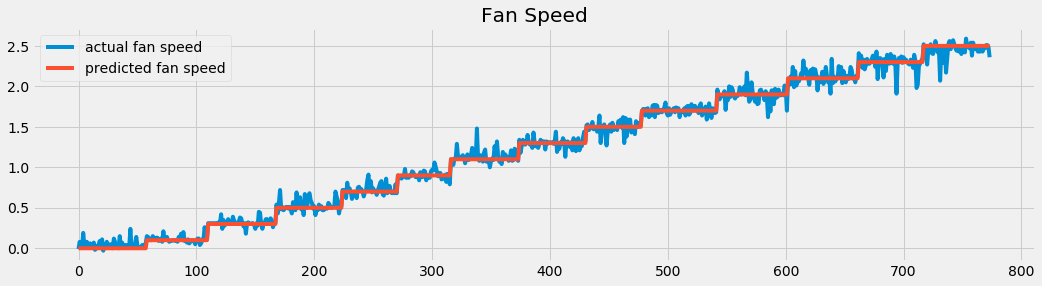

In [178]:
baru["predicted"].plot(figsize=(16,4),legend=True)
baru["actual"].plot(figsize=(16,4))
plt.legend(['actual fan speed','predicted fan speed'])
plt.title('Fan Speed')
plt.show()

In [151]:
teff_sort

,index,Room_T,RH,Teff,actual,predicted
0,1049,21,50,16.1,2.5,2.36
1,1047,21,50,16.5,2.1,2.10
2,825,22,45,16.6,2.5,2.29
3,587,24,40,16.7,2.5,2.35
4,601,23,40,16.8,2.5,2.17
5,838,21,45,16.8,2.3,2.09
6,1231,23,55,16.9,2.5,2.45
7,1257,21,55,16.9,2.1,2.05
8,600,23,40,17.0,2.3,2.11
9,1455,22,60,17.0,2.5,2.40


In [152]:
teff_sort.to_csv('teff_plotly.csv')

In [123]:
teff_sort.predicted = pd.to_numeric(teff_sort.predicted)

In [132]:
teff_sort['predicted']

0      2.364926
1      2.098043
2      2.286257
3      2.347060
4      2.169438
5      2.089338
6      2.448442
7      2.047883
8      2.107002
9      2.402924
10     2.272625
11     1.878593
12     2.028607
13     2.119887
14     2.281914
15     2.227339
16     2.478413
17     1.880973
18     2.244533
19     2.206821
20     2.437609
21     2.563253
22     2.029441
23     2.021953
24     2.275578
25     1.739408
26     2.319731
27     2.319731
28     2.245462
29     2.196477
         ...   
744    0.024304
745    0.589913
746    0.860709
747    0.238999
748    1.095766
749    0.074922
750    0.167369
751    0.360075
752    0.060262
753    0.304447
754    0.011875
755    0.146097
756   -0.002504
757    0.700532
758    0.117372
759    0.016949
760    0.304582
761    0.086188
762    0.326994
763    0.023735
764    0.078972
765    0.717184
766    0.117424
767    0.063843
768    0.310848
769    0.070014
770    0.505740
771    0.098157
772    0.054592
773    0.059046
Name: predicted, Length:

In [163]:
baru

,index,Room_T,RH,Teff,actual,predicted
0,182,22,30,24.2,0.0,-0.01
1,2590,27,90,30.2,0.0,0.08
2,910,30,50,30.0,0.0,0.03
3,70,30,30,30.0,0.0,0.01
4,2394,27,85,29.7,0.0,0.19
5,924,29,50,29.0,0.0,0.03
6,2814,25,95,28.8,0.0,0.03
7,2226,26,80,28.7,0.0,0.08
8,2618,25,90,28.3,0.0,0.06
9,98,28,30,28.0,0.0,0.01
